In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


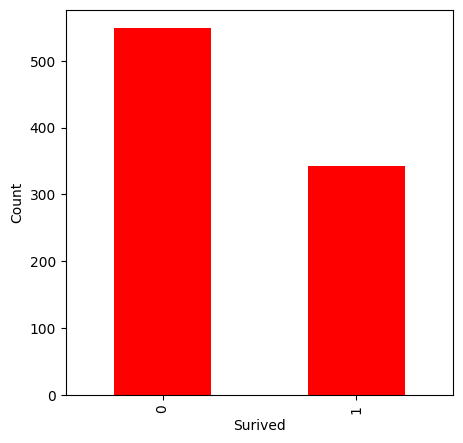

In [38]:
df['survived'].value_counts().plot(xlabel="Surived",ylabel="Count",kind="bar",colormap="autumn",figsize=(5,5))
plt.show()

<AxesSubplot:xlabel='gender'>

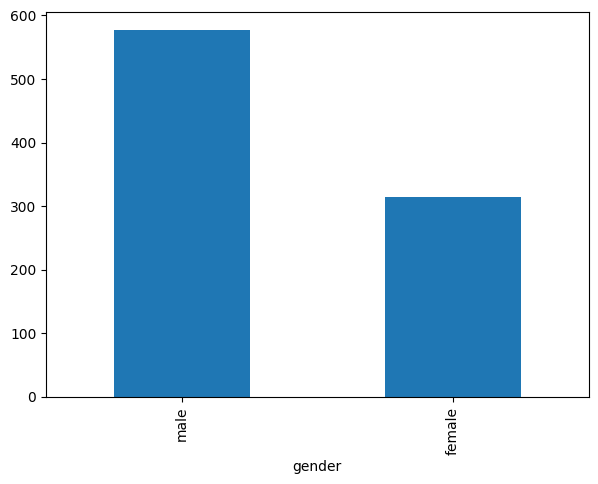

In [39]:
df['sex'].value_counts().plot(kind="bar",xlabel="gender",figsize=(7,5))

<AxesSubplot:ylabel='Frequency'>

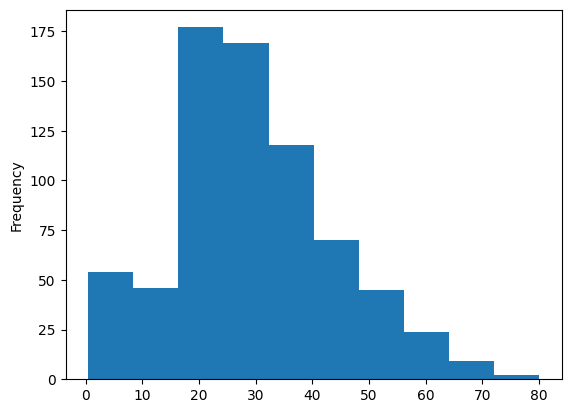

In [48]:
df['age'].plot(kind="hist")

<AxesSubplot:xlabel='pclass', ylabel='age'>

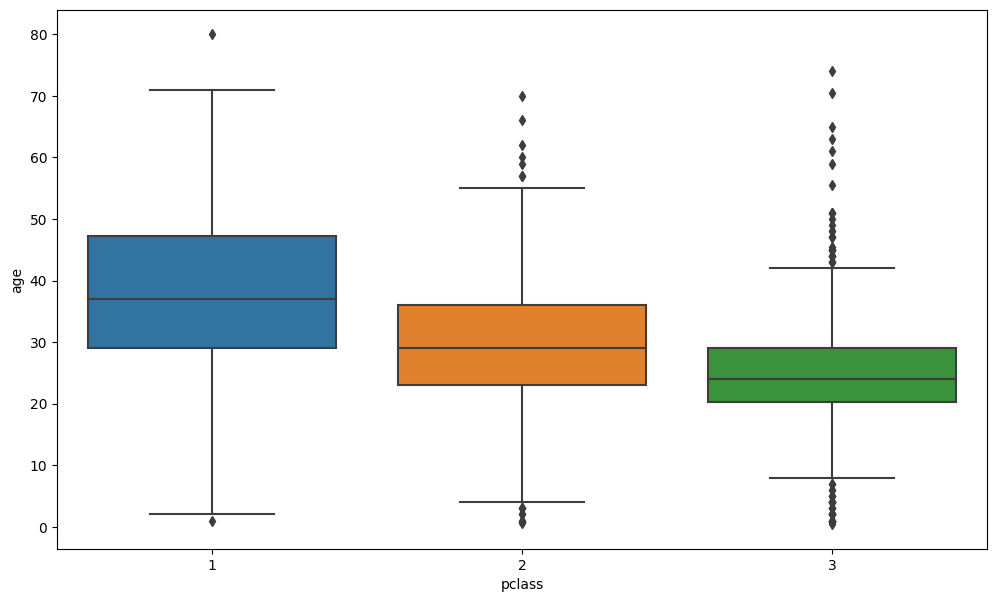

In [77]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=df)

In [37]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

<AxesSubplot:title={'center':'Null Values'}, ylabel='None'>

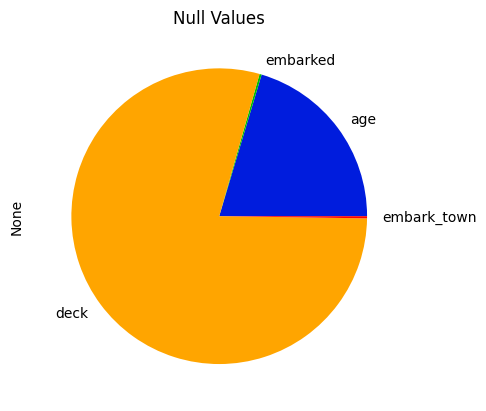

In [65]:
df.isnull().sum().plot(kind="pie",title="Null Values",colormap="nipy_spectral")

In [67]:
print('Percent of missing "deck" records is %.2f%%' %((df['deck'].isnull().sum()/df.shape[0])*100))

Percent of missing "deck" records is 77.22%


In [62]:
print('Percent of missing "Embarked" records is %.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [66]:
print('Percent of missing "age" records is %.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))

Percent of missing "age" records is 19.87%


In [76]:
df['age'].mean()

29.06640852974186

In [72]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [73]:
df['age']=df[['age','pclass']].apply(impute_age,axis=1)

In [74]:
df['embarked']=df['embarked'].fillna('S')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [78]:
Sex = pd.get_dummies(df['sex'],drop_first=True)
Embark = pd.get_dummies(df['embarked'],drop_first=True)

In [83]:
df=pd.concat([df,Sex,Embark],axis=1)

In [84]:
df=df.drop(['class'],axis=1)

In [87]:
df=df.drop(['deck'],axis=1)

In [88]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,no,False,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,no,True,1,0,1


In [89]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone,male,Q,S
886,0,2,male,27.0,0,0,13.00,S,man,True,Southampton,no,True,1,0,1
887,1,1,female,19.0,0,0,30.00,S,woman,False,Southampton,yes,True,0,0,1
888,0,3,female,24.0,1,2,23.45,S,woman,False,Southampton,no,False,0,0,1
889,1,1,male,26.0,0,0,30.00,C,man,True,Cherbourg,yes,True,1,0,0
890,0,3,male,32.0,0,0,7.75,Q,man,True,Queenstown,no,True,1,1,0
